In [1]:
import os
import pandas as pd
import torch as tr

In [2]:
df_ref = pd.read_csv("../data/ArchiveII.csv")
df_ref.head(2)

,id,sequence,structure,base_pairs,len
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115


In [3]:
data_path = "../data/simfolds/6_sim_folds/"
files = [file for file in os.listdir(data_path) if file.endswith(".csv")]
files.sort()
print(files)

['archiveII_similars_splits_less_than_512_k10_NOboostrap_sim30-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim40-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim50-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim60-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim70-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim80-fold.csv', 'archiveII_similars_splits_less_than_512_k10_NOboostrap_sim90-fold.csv']


In [4]:
data_path = "../data/simfolds/6_sim_folds/"
files = [file for file in os.listdir(data_path) if file.endswith(".csv")]
sim_df = {file.split("-")[0].split("_")[-1] : pd.read_csv(data_path + file) for file in files}
sim_df.keys()

dict_keys(['sim40', 'sim50', 'sim30', 'sim90', 'sim60', 'sim80', 'sim70'])

In [5]:
for sim, df_s in sim_df.items():
    print(f"sim: {sim}")
    display(df_s)

sim: sim40


,fold_name,fold_number,partition,id
0,0,0,train,telomerase_AF221919.107-614
1,0,0,train,grp1_a.I1.b.Phormidium.sp.N182.C3.tLEU
2,0,0,train,16s_H.sapiens.mito_domain3
3,0,0,train,telomerase_AF221913.109-520
4,0,0,train,16s_M.polymorpha_domain3
...,...,...,...,...
1185,9,9,test,grp1_a.I1.b.Synechococcus.sp2.C3.tLEU
1186,9,9,test,grp1_a.I1.c.G.prostrata.C3.tLEU
1187,9,9,test,RNaseP_M.barkeri
1188,9,9,test,RNaseP_N.olivacea-chloroplast


sim: sim50


,fold_name,fold_number,partition,id
0,0,0,train,tmRNA_Porp.purp._TRW-2787_1-323
1,0,0,train,16s_M.polymorpha_domain3
2,0,0,train,tmRNA_envi.sequ._TRW-351057-3_1-355
3,0,0,train,RNaseP_SM-A2539
4,0,0,train,tRNA_tdbR00000395-Saccharomyces_cerevisiae-493...
...,...,...,...,...
2585,9,9,test,16s_C.reinhardtii.mito_domain4
2586,9,9,test,grp1_a.I1.e.S.paniceum.UNK.SSU.1506
2587,9,9,test,srp_Oxyt.trif._GSP-99928
2588,9,9,test,srp_Aero.pern._BA000002


sim: sim30


,fold_name,fold_number,partition,id
0,0,0,train,16s_C.reinhardtii.mito_domain3
1,0,0,train,srp_Kluy.lact._CR382126
2,0,0,train,grp1_a.I1.e.L.dispersa.UNK.SSU.1210
3,0,0,valid,grp1_a.I1.e.L.dispersa.UNK.SSU.789
4,0,0,test,16s_M.polymorpha_domain3
5,1,1,train,16s_C.reinhardtii.mito_domain3
6,1,1,train,16s_M.polymorpha_domain3
7,1,1,train,grp1_a.I1.e.L.dispersa.UNK.SSU.1210
8,1,1,valid,srp_Kluy.lact._CR382126
9,1,1,test,grp1_a.I1.e.L.dispersa.UNK.SSU.789


sim: sim90


,fold_name,fold_number,partition,id
0,0,0,train,tRNA_tdbR00000170-Saccharomyces_cerevisiae-493...
1,0,0,train,5s_Gemm_obscuB
2,0,0,train,RNaseP_S.mutans
3,0,0,train,5s_Roseococcus-thiosulfatophilus-2
4,0,0,train,srp_Proc.mari._BX572093
...,...,...,...,...
13275,9,9,test,5s_Neurospora-crassa-11
13276,9,9,test,RNaseP_S.servazzii
13277,9,9,test,telomerase_AF221918.97-547
13278,9,9,test,RNaseP_PS31


sim: sim60


,fold_name,fold_number,partition,id
0,0,0,train,RNaseP_P.cultripes
1,0,0,train,RNaseP_CPA49
2,0,0,train,tmRNA_Oeno.oeni._TRW-203123_1-350
3,0,0,train,tmRNA_Pseu.halo._CR954246_1-357
4,0,0,train,grp1_a.I1.e.P.carinii.C1.SSU.1506
...,...,...,...,...
3665,9,9,test,RNaseP_R.palustris
3666,9,9,test,tRNA_tdbR00000593-Ascaris_suum-6253-Trp-CA
3667,9,9,test,grp1_a.I1.e.S.sclerotiorum_1837.C1.LSU.798
3668,9,9,test,16s_G.intestinalis_domain4


sim: sim80


,fold_name,fold_number,partition,id
0,0,0,train,RNaseP_Synechococcus-PCC7001
1,0,0,train,RNaseP_B.stearothermophilus
2,0,0,train,RNaseP_EM14b-9
3,0,0,train,16s_P.staleyi_domain4
4,0,0,train,srp_Giar.lamb._GSP-184922
...,...,...,...,...
7875,9,9,test,srp_Tric.eryt._CP000393
7876,9,9,test,RNaseP_Calothrix-PCC7601
7877,9,9,test,RNaseP_X.fastidiosa
7878,9,9,test,tRNA_tdbR00000361-Saccharomyces_cerevisiae-493...


sim: sim70


,fold_name,fold_number,partition,id
0,0,0,train,16s_G.intestinalis_domain3
1,0,0,train,srp_Neph.oliv._AF137379
2,0,0,train,RNaseP_A.laidlawii
3,0,0,train,RNaseP_P.hollandica
4,0,0,train,tmRNA_Myco.Bxz1._AY129337_1-437
...,...,...,...,...
5125,9,9,test,5s_Mycoplasma-penetrans-1
5126,9,9,test,RNaseP_SM-A2135
5127,9,9,test,tmRNA_envi.sequ._TRW-32045-3_1-350
5128,9,9,test,tmRNA_Kine.radi._TRW-266940_1-366


In [6]:
data_path = "../data/simfolds/6_sim_folds/"
files = [file for file in os.listdir(data_path) if file.endswith(".csv")]
sim_df = {file.split("-")[0].split("_")[-1] : pd.read_csv(data_path + file) for file in files}

valid_ids = (
    df_ref
    .loc[df_ref["len"] <= 128, "id"]
    .unique()
)

df_filt = {}
for sim, df_s in sim_df.items(): 
    df_filt[sim] = df_s[df_s["id"].isin(valid_ids)].reset_index(drop=True) 

In [7]:
df_filt = {}
for sim, df_s in sim_df.items():
    print(10 * "-" + f"sim: {sim}" + 10 * "-" )
    df_filt[sim] = df_s[df_s["id"].isin(valid_ids)].reset_index(drop=True)
    print("Full")
    print(df_s.query("fold_number == 0")["partition"].value_counts())
    print("max128")
    print(df_filt[sim].query("fold_number == 0")["partition"].value_counts())

----------sim: sim40----------
Full
partition
train    96
test     12
valid    11
Name: count, dtype: int64
max128
partition
train    7
valid    1
Name: count, dtype: int64
----------sim: sim50----------
Full
partition
train    209
test      26
valid     24
Name: count, dtype: int64
max128
partition
train    20
test      5
valid     1
Name: count, dtype: int64
----------sim: sim30----------
Full
partition
train    3
valid    1
test     1
Name: count, dtype: int64
max128
Series([], Name: count, dtype: int64)
----------sim: sim90----------
Full
partition
train    1075
test      133
valid     120
Name: count, dtype: int64
max128
partition
train    512
valid     63
test      50
Name: count, dtype: int64
----------sim: sim60----------
Full
partition
train    297
test      37
valid     33
Name: count, dtype: int64
max128
partition
train    54
test     10
valid     4
Name: count, dtype: int64
----------sim: sim80----------
Full
partition
train    638
test      79
valid     71
Name: count, dty

In [8]:
import pandas as pd

rows = []

df_filt = {}

for sim, df_s in sim_df.items():
    df_filt[sim] = df_s[df_s["id"].isin(valid_ids)].reset_index(drop=True)

    # Conteos FULL
    full_counts = (
        df_s.query("fold_number == 0")["partition"]
        .value_counts()
        .to_dict()
    )

    # Conteos FILTRADO (max128)
    filt_counts = (
        df_filt[sim].query("fold_number == 0")["partition"]
        .value_counts()
        .to_dict()
    )

    # Guardamos en formato largo
    for part, n in full_counts.items():
        rows.append({
            "sim": sim,
            "dataset": "full",
            "partition": part,
            "count": n
        })

    for part, n in filt_counts.items():
        rows.append({
            "sim": sim,
            "dataset": "max128",
            "partition": part,
            "count": n
        })

# DataFrame final
counts_df = pd.DataFrame(rows)

In [ ]:
# valid_ids = (
#     df_seq
#     .loc[df_seq["len"] <= 128, "id"]
#     .unique()
# )
# df_part_filt = df_part[df_part["id"].isin(valid_ids)].reset_index(drop=True)
# print("Antes:", len(df_part))
# print("Después:", len(df_part_filt))

# assert df_part_filt["id"].isin(valid_ids).all()


<Axes: ylabel='sim'>

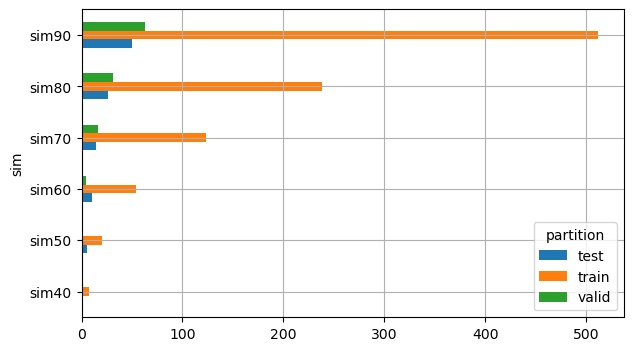

In [11]:
#counts_df.query("dataset == 'max128'").groupby(["sim"])["count"].sum().plot(kind="barh",hue="partition", grid=True)
(
    counts_df
    .query("dataset == 'max128'")
    .groupby(["sim", "partition"])["count"]
    .sum()
    .unstack("partition")
    .plot(
        kind="barh",
        figsize=(7, 4),
        grid=True
    )
)


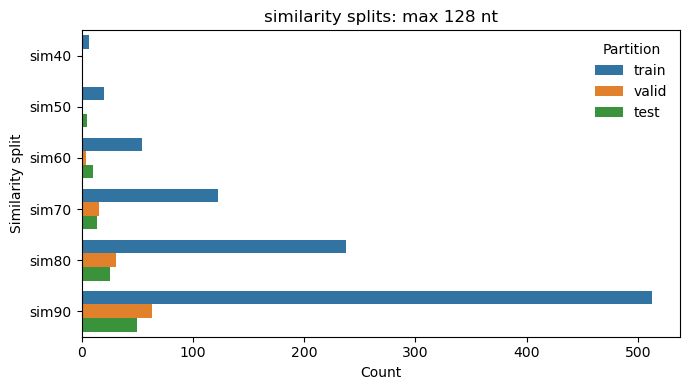

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df_plot = (
    counts_df
    .query("dataset == 'max128'")
    .groupby(["sim", "partition"], as_index=False)["count"]
    .sum()
)

plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=df_plot,
    y="sim",
    x="count",
    hue="partition",
    orient="h"
)

ax.set_xlabel("Count")
ax.set_ylabel("Similarity split")
ax.legend(title="Partition", frameon=False)
plt.title("similarity splits: max 128 nt")
plt.tight_layout()
plt.show()


/tmp/ipykernel_3346832/3385826384.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=counts_df, x="sim", y="count", hue="dataset", ci=None)


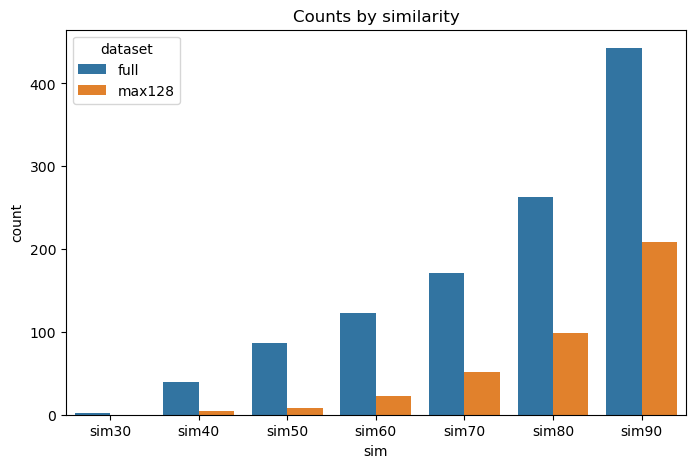

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=counts_df, x="sim", y="count", hue="dataset", ci=None)
plt.title("Counts by similarity")
plt.show()

# plt.figure(figsize=(8,5))
# sns.barplot(data=counts_df, x="partition", y="count", hue="dataset", ci=None, kind="stack")
# plt.title("Partitions distribution")
# plt.show()

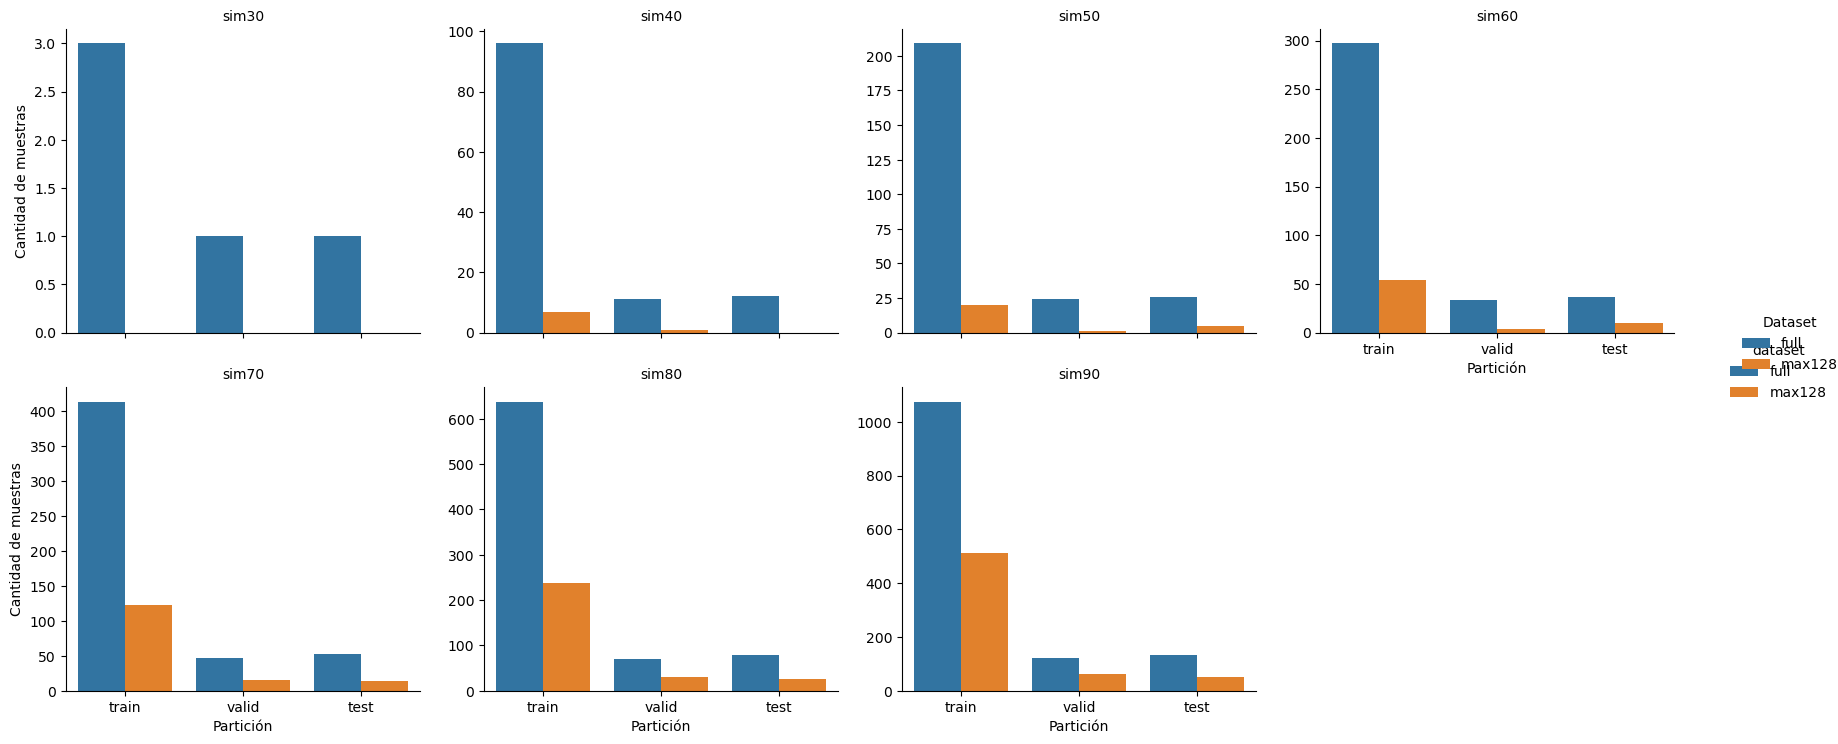

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=counts_df,
    kind="bar",
    x="partition",
    y="count",
    hue="dataset",
    col="sim",
    col_wrap=4,
    height=4,
    sharey=False
)

g.set_titles("{col_name}")
g.set_axis_labels("Partición", "Cantidad de muestras")

g.fig.subplots_adjust(top=0.9, right=0.85)  
g.add_legend(title="Dataset")
g._legend.set_bbox_to_anchor((1.02, 0.5))   

plt.show()

In [22]:
import pandas as pd
from pathlib import Path

save_path = Path("/home/gkulemeyer/Documents/Repos/RNADiffusion/data/simfolds_max128")

base_name = lambda x: f"ArchiveII_partitions_{x}.csv"

df_filt = {}

for sim, df_s in sim_df.items():
    df_f = df_s[df_s["id"].isin(valid_ids)].reset_index(drop=True)
    df_filt[sim] = df_f
    df_f.to_csv(save_path / base_name(sim), index=False)


In [9]:
import os
import pandas as pd
from pathlib import Path


DATA_PATH = Path("/home/gkulemeyer/Documents/Repos/RNADiffusion/data/ArchiveII_max_length_128.csv")
SIM_PATH = Path("/home/gkulemeyer/Documents/Repos/RNADiffusion/data/simfolds/6_sim_folds")
OUT_BASE = Path("/home/gkulemeyer/Documents/Repos/RNADiffusion/data/simfolds/simfolds_max128/joined")

def create_partitions(
    data_path: Path,
    partitions_path: Path,
    out_dir: Path,
    fold_number: int = 0,
):
    """
    Create train/valid/test CSVs using SIM_PATH only as partition labels,
    keeping only rows present in data_path.
    """
    
    df = pd.read_csv(data_path, index_col="id")

    df_parts = pd.read_csv(
        partitions_path,
        index_col=["partition", "fold_number"]
    )

    out_dir.mkdir(parents=True, exist_ok=True)

    for part in ["train", "valid", "test"]:
        part_ids = df_parts.loc[(part, fold_number), "id"]

        part_ids = part_ids[part_ids.isin(df.index)]

        df_part = df.loc[part_ids].reset_index()

        df_part.to_csv(out_dir / f"{part}.csv", index=False)

        print(f"{out_dir.name} | {part}: {len(df_part)} sequences")


In [10]:
partition_files = sorted(SIM_PATH.glob("*.csv"))

for part_file in partition_files:
    sim = part_file.stem.split("_")[-1].split("-")[0]  # ej: sim60
    
    out_dir = OUT_BASE / sim

    create_partitions(
        data_path=DATA_PATH,
        partitions_path=part_file,
        out_dir=out_dir,
        fold_number=0,
    )


sim30 | train: 0 sequences
sim30 | valid: 0 sequences
sim30 | test: 0 sequences
sim40 | train: 3 sequences
sim40 | valid: 0 sequences
sim40 | test: 0 sequences
sim50 | train: 15 sequences
sim50 | valid: 1 sequences
sim50 | test: 5 sequences
sim60 | train: 51 sequences
sim60 | valid: 4 sequences
sim60 | test: 8 sequences
sim70 | train: 118 sequences
sim70 | valid: 16 sequences
sim70 | test: 13 sequences
sim80 | train: 234 sequences
sim80 | valid: 29 sequences
sim80 | test: 26 sequences
sim90 | train: 507 sequences
sim90 | valid: 62 sequences
sim90 | test: 50 sequences


/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_415591/119188714.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
  part_ids = df_parts.loc[(part, fold_number), "id"]
/tmp/ipykernel_4